In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
%matplotlib inline

In [85]:
#1

pd_data_original = pd.read_csv('./Reviews.csv', index_col=False)
pd_data_original = pd_data_original[:10000]

pd_data = pd_data_original.copy()
pd_data['Score count'] = pd_data.groupby('UserId')['UserId'].transform('count')
pd_data['Score mean'] = pd_data.groupby('UserId')['Score'].transform('mean')
pd_data = pd_data[['UserId', 'ProfileName', 'Score count', 'Score mean']]
pd_data = pd_data.sort_values(by=['Score count'], ascending=False)
pd_data = pd_data.drop_duplicates(subset='UserId')
pd_data.set_index('UserId', inplace=True)
print(pd_data)

                                               ProfileName  Score count  \
UserId                                                                    
A1Z54EM24Y40LL                                          c2           17   
A2SZLNSI5KOQJT  Carrie, "Formerly &#34;Sister Carrie&#34;"           10   
A35R32TA60XD57                                    M. Torma            9   
A281NPSIMI1C2R      Rebecca of Amazon "The Rebecca Review"            8   
A3NHUQ33CFH3VM                                Citizen John            7   
A3PJZ8TU8FDQ1K                                Jared Castle            7   
A3OXHLG6DIBRW8                            C. F. Hill "CFH"            7   
AP03SDCDB6RBD                        E. OConnor "erdoreen"            6   
ABQN42N7ICNZQ                             T.O. Perspective            6   
A3TX6CWSZL02PW                          LaVerne ":LaVerne"            6   
A26NFIQ7KWI8Y7                                     kt rose            6   
AY12DBB0U420B            

Text(0.5, 1.0, 'Review distribution of the user with most reviews')

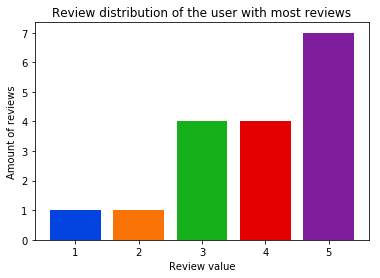

In [94]:
#2

# Find the user with most reviews by getting the top user from previously generated table, and finding that UserId
# in the original data table (in order to find all of their reviews)

most_reviews_user = pd_data.iloc[0].name
mru_reviews_values = pd_data_original.loc[pd_data_original['UserId'] == most_reviews_user].Score.values
values, count = np.unique(mru_reviews_values, return_counts=True)
colors = ['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:purple']

mru_plot = plt.subplot()
plot1 = mru_plot.bar(values, height=count, color=colors)
mru_plot.set_xlabel('Review value')
mru_plot.set_ylabel('Amount of reviews')
mru_plot.set_title('Review distribution of the user with most reviews')

Text(0.5, 1.0, 'Amount of reviews in a given year')

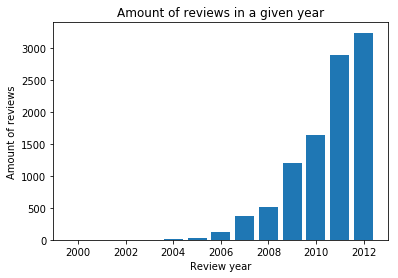

In [95]:
#3

review_years = pd_data_original['Time'].values

# 1970 is the start of the time. 365.25 accounts for leap years.
review_years = [1970 + math.floor(x / 60 / 60 / 24 / 365.25) for x in review_years]
review_years, review_count = np.unique(review_years, return_counts=True)

year_plot = plt.subplot()
year_reviews_plot = year_plot.bar(review_years, height=review_count)
year_plot.set_xlabel('Review year')
year_plot.set_ylabel('Amount of reviews')
year_plot.set_title('Amount of reviews in a given year')

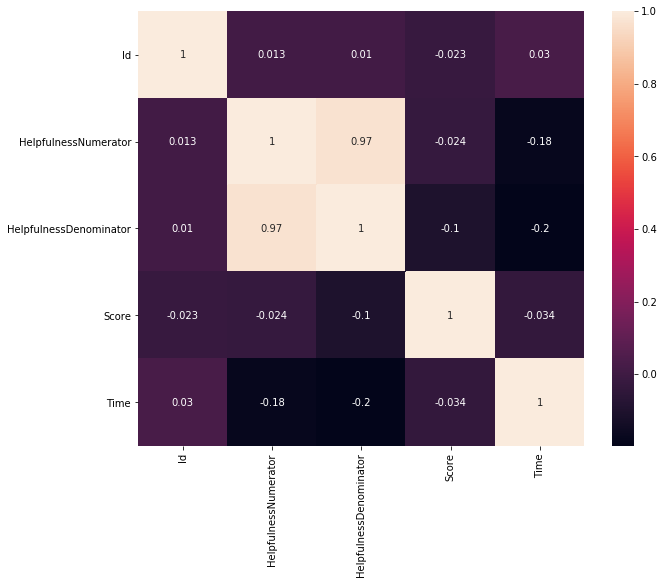

In [96]:
#4
#pd_data_original = pd_data_original.drop(columns=['Score count', 'Score mean'])
plt.figure(figsize=(10,8))
sns.heatmap(pd_data_original.corr(), annot=True)

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

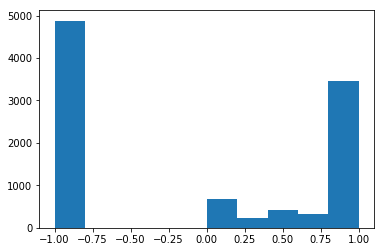

In [97]:
#5

helpful_frame = pd_data_original[['HelpfulnessNumerator', 'HelpfulnessDenominator']]

# Filter out rows where Numerator > Denominator.
helpful_frame = helpful_frame[helpful_frame.HelpfulnessNumerator <= helpful_frame.HelpfulnessDenominator]

# Anytime we divide by zero, it means that the comment was only upvoted (no comments).
helpful_comm = [x/y if y!=0 else -1.0 for x,y in zip(helpful_frame['HelpfulnessNumerator'], helpful_frame['HelpfulnessDenominator'])]


#print(helpful_comm)
plt.hist(helpful_comm)